# Predicting the Status of H-1B Visa Applications

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

It contains five year's worth of H-1B petition data, with approximately 3 million records overall. The columns in the dataset include case status, employer name, worksite coordinates, job title, prevailing wage, occupation code, and year filed.
CASE_ID - A unique case ID for every applicant.

CASE_STATUS – The target variable consists of 6 different classes or values.

EMPLOYER_NAME – Name of the employer submitting the application.

SOC_NAME – Occupational name associated with an occupational code

JOB_Title – Title of the Job

FULL_TIME_POSITION – Whether the position is full time or not

PREVAILING_WAGE - The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment
YEAR – Year in which h1b petition was filed

WORKSITE - City and State information of the foreign worker’s intended area of employment

Lon – Longitude of the worksite

Lat – Latitude of the worksite

In [3]:
#Selecting data from csv 
df1 = pd.read_csv('h1b.csv',engine='python')

In [4]:
#Showes top 5 rows of DataFrame
df1.head()

,id,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
#droping Id as it in not needed in prediction
df1.drop('id', axis = 1, inplace= True)

In [6]:
df1.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


# 1. Exploratory Data Analysis (EDA)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 10 columns):
CASE_STATUS           5116 non-null object
EMPLOYER_NAME         5116 non-null object
SOC_NAME              5116 non-null object
JOB_TITLE             5116 non-null object
FULL_TIME_POSITION    5116 non-null object
PREVAILING_WAGE       5116 non-null float64
YEAR                  5116 non-null int64
WORKSITE              5116 non-null object
lon                   4831 non-null float64
lat                   4831 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 399.8+ KB


In [8]:
df1.describe(include='all')

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
count,5116,5116,5116,5116,5116,5.116000e+03,5116.0,5116,4831.000000,4831.000000
unique,4,3491,10,2380,2,NaN,NaN,1063,NaN,NaN
top,CERTIFIED,AMAZON CORPORATE LLC,MARKETING MANAGERS,MARKETING MANAGER,Y,NaN,NaN,"NEW YORK, NEW YORK",NaN,NaN
freq,4257,52,2132,244,4125,NaN,NaN,668,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.277728e+05,2016.0,NaN,-93.878500,37.382679
std,NaN,NaN,NaN,NaN,NaN,1.017993e+06,0.0,NaN,27.348115,5.395582
min,NaN,NaN,NaN,NaN,NaN,1.200000e+04,2016.0,NaN,-157.858333,13.476282
25%,NaN,NaN,NaN,NaN,NaN,7.440200e+04,2016.0,NaN,-118.396467,34.038637
50%,NaN,NaN,NaN,NaN,NaN,1.084930e+05,2016.0,NaN,-87.841182,37.774929
75%,NaN,NaN,NaN,NaN,NaN,1.431460e+05,2016.0,NaN,-74.205701,40.712784


In [9]:
#Checking for total null values
df1.isnull().sum()

CASE_STATUS             0
EMPLOYER_NAME           0
SOC_NAME                0
JOB_TITLE               0
FULL_TIME_POSITION      0
PREVAILING_WAGE         0
YEAR                    0
WORKSITE                0
lon                   285
lat                   285
dtype: int64

In [10]:
#Calculating null value Percentage
c = df1['CASE_STATUS'].count()
print("Total Rows ",c)



for value in ["CASE_STATUS","EMPLOYER_NAME","SOC_NAME","JOB_TITLE","FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","WORKSITE","lon","lat"]:
    print(value," : Null Percentage ", (df1[value].isnull().sum()*100 )/c )
   
     

Total Rows  5116
CASE_STATUS  : Null Percentage  0.0
EMPLOYER_NAME  : Null Percentage  0.0
SOC_NAME  : Null Percentage  0.0
JOB_TITLE  : Null Percentage  0.0
FULL_TIME_POSITION  : Null Percentage  0.0
PREVAILING_WAGE  : Null Percentage  0.0
YEAR  : Null Percentage  0.0
WORKSITE  : Null Percentage  0.0
lon  : Null Percentage  5.570758405003909
lat  : Null Percentage  5.570758405003909


As in this we are going to predict whether Application is Certified or DENIED 
let's check CASE_STATUS column

In [11]:
df1["CASE_STATUS"].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

Note that target variable contain 4 differnt classes 1 'CERTIFIED-WITHDRAWN', 2 'WITHDRAWN', 3 'CERTIFIED', 4 'DENIED'
Now, depending on the business problem you should decide whether to go for multi class classification or binary class classification. In case we are using binary class classification, you would classify either Certified or Denied.
So the first thing that you should do is to convert remaining classes into either denied or certified.
like 
CERTIFIED-WITHDRAWN  = CERTIFIED
we WITHDRAWN values because user might withdrean application

In [12]:
df1.CASE_STATUS[df1['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df1.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [14]:
#Drop rows with withdrawn
df1 = df1[df1.CASE_STATUS != 'WITHDRAWN']


In [15]:
#Checking the percentage of Certified and Denied classes in the Dataset.
print(df1['CASE_STATUS'].value_counts())

CERTIFIED    4625
DENIED        272
Name: CASE_STATUS, dtype: int64


In [16]:
#We are going to drop lat and log 
df1.drop('lat', axis = 1, inplace= True)
df1.drop('lon', axis = 1, inplace= True)

In [17]:
df1.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN"
1,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS"
2,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO"
5,CERTIFIED,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016,"MIAMI, FLORIDA"


In [18]:
df1["JOB_TITLE"].unique()

array(['POSTDOCTORAL RESEARCH FELLOW', 'CHIEF OPERATING OFFICER',
       'CHIEF PROCESS OFFICER', ..., 'SOFTWARE SALES ACCOUNT REP',
       'DIRECTOR OF GLOBAL MARKETING & PLANNING',
       'MANAGER, BUSINESS DEVELOPMENT 1'], dtype=object)

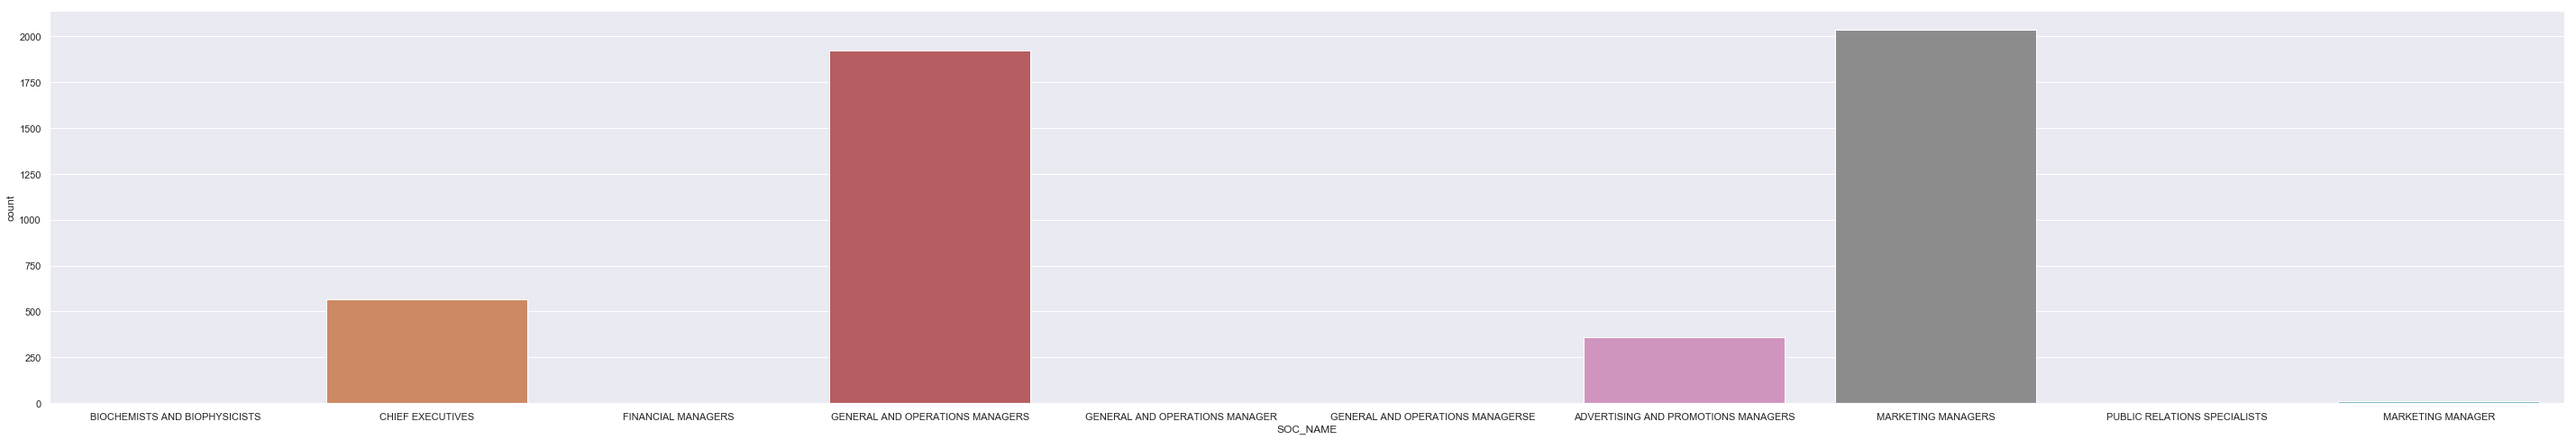

In [19]:
#Distribution of the variable SOC_NAME
sns.set(rc={'figure.figsize':(50,8)})
sns.countplot(df1.SOC_NAME)

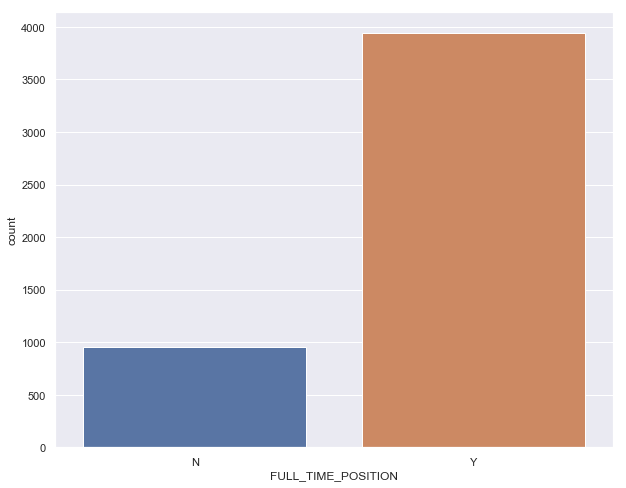

In [20]:
#Distribution of the variable FULL_TIME_POSITION
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(df1.FULL_TIME_POSITION)

In [21]:
#As we see we have lots of people who are appling for the full time jobs

In [22]:
#Distribution of the variable FULL_TIME_POSITION
print(df1['JOB_TITLE'].value_counts())
#as we see 236 peoples are appling for OPERATIONS MANAGER  post

OPERATIONS MANAGER                                              236
MARKETING MANAGER                                               234
GENERAL MANAGER                                                 147
CHIEF EXECUTIVE OFFICER                                         147
PRODUCT MANAGER                                                 113
BUSINESS DEVELOPMENT MANAGER                                    100
CHIEF OPERATING OFFICER                                          85
PRODUCT MARKETING MANAGER                                        58
SENIOR PRODUCT MANAGER                                           56
DIRECTOR OF OPERATIONS                                           49
MANAGING DIRECTOR                                                39
GENERAL AND OPERATIONS MANAGER                                   37
PRESIDENT                                                        37
CEO                                                              36
ACCOUNT DIRECTOR                                

In [26]:
print(df1['EMPLOYER_NAME'].value_counts())

AMAZON CORPORATE LLC                                                      51
ADOBE SYSTEMS INCORPORATED                                                33
GOOGLE INC.                                                               21
APPLE INC.                                                                20
CISCO SYSTEMS, INC.                                                       18
SEARS HOLDINGS MANAGEMENT CORPORATION                                     18
WAL-MART ASSOCIATES, INC.                                                 18
ECOLAB USA INC.                                                           14
VMWARE, INC.                                                              13
SNAPRAYS, LLC                                                             13
MICROSOFT CORPORATION                                                     12
CVS PHARMACY, INC.                                                        12
EMC CORPORATION                                                           11

Bivariate Analysis

Firstly we individually analysed some of the existent features, now it is time to understand the relationship between our target variable and predictors as well as the relationship among predictors.

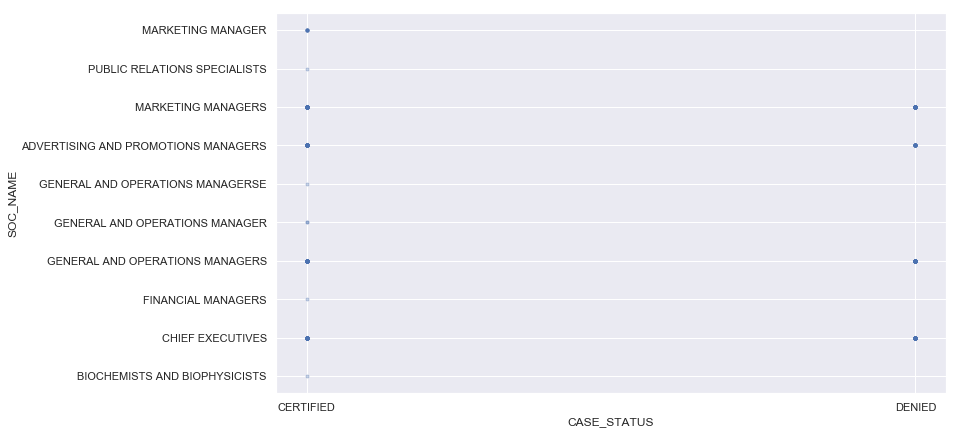

In [37]:
plt.figure(figsize=(12,7))
plt.xlabel('CASE_STATUS')
plt.ylabel('SOC_NAME')
plt.plot(df1.CASE_STATUS ,df1.SOC_NAME,'.' , alpha = 0.3)

as we see some SOC_NAME are have more certified rate

In [40]:
#dropping year
df1.drop(["YEAR"], axis=1,inplace = True)

In [41]:
df1.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,"PLANO, TEXAS"
2,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,"DENVER, COLORADO"
5,CERTIFIED,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,"MIAMI, FLORIDA"


In [42]:
#Non-numerical Features
#Counting Non number variables
df1.dtypes.value_counts()

object     6
float64    1
dtype: int64

In [44]:
d = df1.select_dtypes(include = [object]).columns
d

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'WORKSITE'],
      dtype='object')

In [45]:
#For preprocessing the data
#Lable Encoding

from sklearn import preprocessing
le = {}

for x in d:
    le[x]= preprocessing.LabelEncoder()    
print("le ", le)
    
for x in d:
    df1[x]=le[x].fit_transform(df1.__getattr__(x))

le  {'CASE_STATUS': LabelEncoder(), 'EMPLOYER_NAME': LabelEncoder(), 'SOC_NAME': LabelEncoder(), 'JOB_TITLE': LabelEncoder(), 'FULL_TIME_POSITION': LabelEncoder(), 'WORKSITE': LabelEncoder()}


In [46]:
# Creating X and Y values
# Create Y first, as it has only one column

In [47]:
y = df1.CASE_STATUS
df1.drop(['CASE_STATUS'],inplace=True , axis=1)

y

0       0
1       0
2       0
3       0
5       0
6       0
7       0
8       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      1
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      1
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
70      0
71      0
72      0
73      0
74      0
75      0
77      0
78      0
80      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      1
92      0
93      0
94      0
95      1
96      0
97      0
98      1
99      0
100     0
101     0
102     0
103     0
104     0
106     0


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df1)

X = scaler.transform(df1)

X

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  import sys


array([[ 1.48172913, -1.80218806,  0.55270918, -2.02904716, -0.08863609,
        -1.88926713],
       [-0.41403649, -1.40490189, -1.16613561,  0.49284217,  0.10995616,
         0.63611797],
       [ 0.67620235, -1.40490189, -1.15378093,  0.49284217,  0.06227256,
        -0.40353487],
       ...,
       [ 1.46784074,  0.97881511, -0.85572428,  0.49284217,  0.05473477,
         0.31235065],
       [-0.72255722,  0.97881511,  0.08786436,  0.49284217, -0.01785179,
         0.93830081],
       [ 1.0244042 ,  0.97881511,  0.13419441,  0.49284217,  0.01152945,
        -1.53312308]])

In [52]:
y = y.astype(int)

#y = y.values.ravel()

y = y.values.reshape(-1 )
y

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
# Splitting the data, will 
# Random_state will do the selections same for all users.

from sklearn.model_selection import train_test_split

#Splitthe data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

In [54]:
#sklearn is the module for machine learning
# Predict is the method for predicting the value
# Will compare Y_pred with Y_test

from sklearn.linear_model import LogisticRegression
#create a model
classifier=(LogisticRegression())

# Fitting training data to model
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
print(list(zip(Y_test, Y_pred)))
#print(Y_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score

print("-----------------")
print("Classification Report: ")

print(classification_report(Y_test, Y_pred))

print("-----------------")
print("Accuracy Report: ")

accuracy_score = accuracy_score(Y_test, Y_pred)

print("Accuracy of the model: ", accuracy_score)


precision_score = precision_score(Y_test, Y_pred)

print("Precision Score of the model: ", precision_score)

recall_score = recall_score(Y_test, Y_pred)

print("Recall Score of the model: ", recall_score)

-----------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1390
           1       0.00      0.00      0.00        80

   micro avg       0.95      0.95      0.95      1470
   macro avg       0.47      0.50      0.49      1470
weighted avg       0.89      0.95      0.92      1470

-----------------
Accuracy Report: 
Accuracy of the model:  0.9455782312925171
Precision Score of the model:  0.0
Recall Score of the model:  0.0


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Recusrsive Feature Elemination

In [59]:
from sklearn.feature_selection import RFE

rfe = RFE(classifier, 4)
model_rfe = rfe.fit(X_train, Y_train)

print("Num Features: ", model_rfe.n_features_)
print("Selected Features: " )
print(list(zip(d, model_rfe.support_)))
print("Feature Ranking : ", model_rfe.ranking_)


Num Features:  4
Selected Features: 
[('CASE_STATUS', True), ('EMPLOYER_NAME', True), ('SOC_NAME', False), ('JOB_TITLE', True), ('FULL_TIME_POSITION', True), ('WORKSITE', False)]
Feature Ranking :  [1 1 2 1 1 3]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
Y_pred= model_rfe.predict(X_test)
print(list(zip(Y_test, Y_pred)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("-----------------")
print("Confusion Matrix")

confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
print("-----------------")
print("Classification Report: ")

print(classification_report(Y_test, Y_pred))

print("-----------------")
print("Accuracy Report: ")

accuracy_score = accuracy_score(Y_test, Y_pred)

print("Accuracy of the model: ", accuracy_score)

-----------------
Confusion Matrix
[[1390    0]
 [  80    0]]
-----------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1390
           1       0.00      0.00      0.00        80

   micro avg       0.95      0.95      0.95      1470
   macro avg       0.47      0.50      0.49      1470
weighted avg       0.89      0.95      0.92      1470

-----------------
Accuracy Report: 
Accuracy of the model:  0.9455782312925171


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Here we got  Accuracy of 94% for our small H1B visa data Set